EN2550 Excercise 06

Index No.&nbsp;&nbsp;:&nbsp;190018V

Name&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;Abeywickrama K.C.S.

Github &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;https://github.com/KCSAbeywickrama/EN2550-Excercises

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

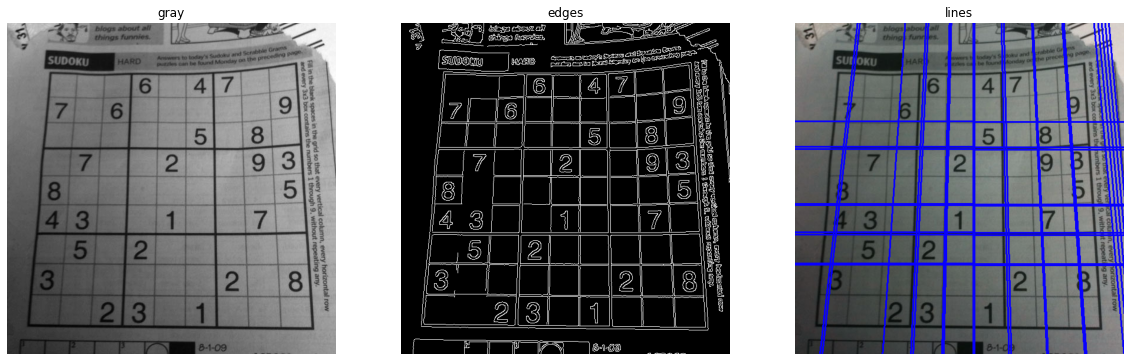

In [5]:
# q1

im=cv.imread('sudoku.png',cv.IMREAD_COLOR)
assert im is not None
gray=cv.cvtColor(im,cv.COLOR_BGR2GRAY)
edges=cv.Canny(gray,50,150,apertureSize=3)
lines=cv.HoughLines(edges,1,np.pi/180,200)

for line in lines:
    rho,theta=line[0]
    a=np.cos(theta)
    b=np.sin(theta)
    x0,y0=a*rho,b*rho
    x1,y1=int(x0 + 1000*(-b)), int(y0 + 1000*(a))

    x2,y2=int(x0 - 1600*(-b)), int(y0 - 1000*(a))

    cv.line(im, (x1, y1), (x2, y2), (8,0,255), 2)


fig, ax = plt.subplots(1,3, figsize = (20,8))

ax[0].imshow(gray,cmap='gray')
ax[0].set_title('gray')
ax[0].axis("off")

ax[1].imshow(edges,cmap='gray')
ax[1].axis('off')
ax[1].set_title("edges")

ax[2].axis('off')
ax[2].imshow(im)
ax[2].set_title('lines')
plt.show()

 


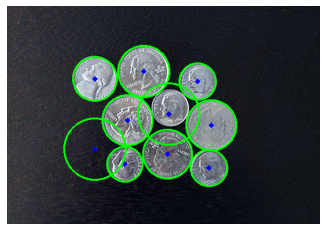

In [6]:
# q2

im = cv.imread(r'coins.jpg', cv.IMREAD_COLOR)
assert im is not None
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT , 1, 50, param1=150, param2=20, minRadius=20, maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
  # draw the outer circle
  cv.circle(im, (i[0], i[1]), i[2], (0,255,0), 2)
  # draw the center of Nge circle
  cv.circle(im, (i[0],i[1]),2, (0,0,255),3)


fig, ax = plt.subplots()
ax.imshow(im)
ax.axis('off')
plt.show()

x = 29.0, y = 109.0, scale = 1.0, orientation = 0.0, p1 = (4, 76), p2 = (54, 141)


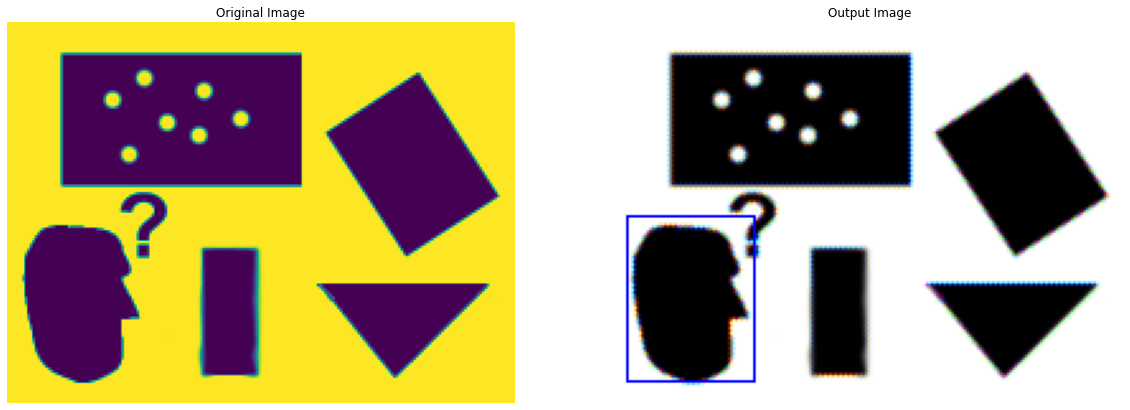

In [9]:
# q3

im=cv.imread(r'pic1.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
templ=cv.imread(r'templ.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert templ is not None

im_edges = cv.Canny(im, 50, 250)
templ_edges = cv.Canny(templ, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
  halfHeight = templ.shape[0] / 2. * scale
  halfWidth = templ.shape[1]/ 2. * scale
  p1 = (int (x - halfWidth), int (y - halfHeight))
  p2 = (int (x + halfWidth), int (y + halfHeight))
  print("x = {}, y = {}, scale = {}, orientation = {}, p1 = {}, p2 = {}".format(x, y, scale, orientation, p1, p2))
  cv.rectangle(out, p1, p2, (0,0,255))

fig, ax = plt.subplots(1,2, figsize = (20,8))

ax[0].imshow(im)
ax[0].set_title('Original Image')
ax[0].axis("off")

ax[1].imshow(out)
ax[1].axis('off')
ax[1].set_title("Output Image")
plt.show()

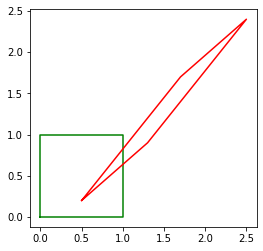

In [10]:
# q4

a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]
X = np.array([a, b, c, d]).T

theta = np.pi*30/180
s = 2
tx, ty = 0.5, 0.2

# H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0, 0, 1]])
# Y = H @ X

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5
A = np.array([[a11, a12, tx], [a21, a22, ty], [0,0,1]])
Y = A @ X

x = np.append(X[0,:], X[0,0])
y = np.append(X[1,:], X[1,0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')
ax.set_aspect ('equal')

x = np.append(Y[0,:], Y[0,0])
y = np.append(Y[1,:], Y[1,0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')

plt.show()

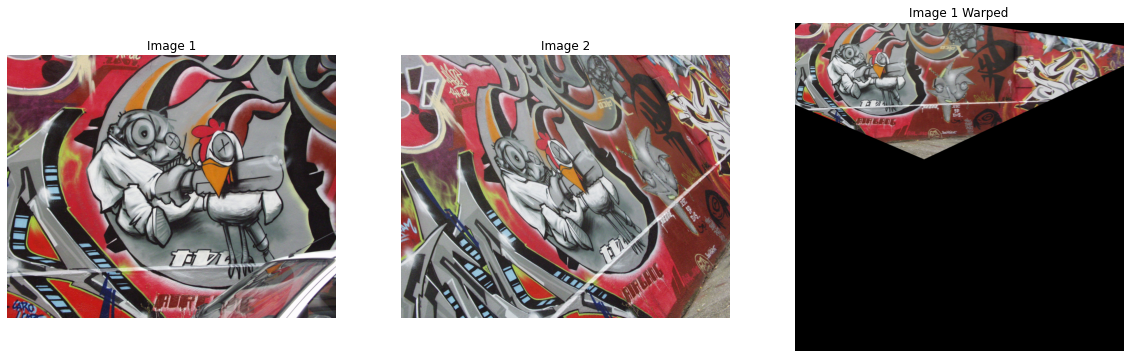

In [18]:
# q5

im1 = cv.imread(r'graf\img1.ppm', cv.IMREAD_ANYCOLOR)
assert im1 is not None
im4 = cv.imread(r'graf\img4.ppm', cv.IMREAD_ANYCOLOR)
assert im4 is not None
# H = np.array([[6.6378505e-01,6.8003334e-01-3.1230335e+01],
# [-1.4495500e-01,9.7128304e-01,1.4877420e+02],
# [4.2518504e-04,-1.3930359e-05,1.0000000e+00]])

H = []
with open(r'graf\H1to4p') as f:
  H = np.array([[float(h) for h in line.split()] for line in f])

imlto4 =cv.warpPerspective(im4, np.linalg.inv(H), (2000,2000))

fig, ax = plt.subplots(1,3, figsize = (20,8))

ax[0].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Image 1')

ax[1].imshow(cv.cvtColor(im4,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title('Image 2')

ax[2].axis('off')
ax[2].imshow(cv.cvtColor(imlto4,cv.COLOR_BGR2RGB))
ax[2].set_title('Image 1 Warped')

plt.show()